# CCI analysis between two clusters
## 1. Find spatially adjacent clusters/celltypes;
## 2. Given two celltypes, find space-specific ligand-receptor pairs.
## 3. (Optional),Loop executes multiple two-cell type interactions.

In [2]:
import sys
sys.path.insert(0,'/DATA/User/zuolulu/spateo-release')
sys.path.insert(0,'/DATA/User/zuolulu/dynamo-release')
import spateo as st
import dynamo as dyn
import scanpy as sc
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import anndata as ad
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns

# Load data (axolotl data)

In [46]:
os.chdir('/DATA/User/zuolulu/06.axolotl/')
os.getcwd()

'/DATA/User/zuolulu/06.axolotl'

In [47]:
adata = ad.read("/DATA/User/zuolulu/06.axolotl/data/2DPI_1.h5ad")
adata

AnnData object with n_obs × n_vars = 7668 × 27324
    obs: 'CellID', 'spatial_leiden_e30_s8', 'Batch', 'cell_id', 'seurat_clusters', 'inj_uninj', 'D_V', 'inj_M_L', 'Annotation'
    var: 'Axolotl_ID', 'hs_gene'
    uns: 'Annotation_colors', 'Injury_2DPI_rep1_SS200000147BL_D5', '__type', 'angle_dict'
    obsm: 'X_pca', 'X_spatial', 'spatial'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [ ]:
color_key={'CCKIN': '#99cfdd',
 'CMPN': '#ccc8fb',
 'CP': '#666666',
 'dpEX': '#fffe2e',
 'IMN': '#95c454',
 'MCG': '#04047d',
 'mpEX': '#4ec602',
 'MPIN': '#1c9d79',
 'MSN': '#775613',
 'nptxEX': '#b904ab',
 'NPYIN': '#b58396',
 'NTNG1EX': '#fe3030',
 'OBNBL': '#02ffff',
 'OLIGO': '#AF5F3C',
 'reaEGC': '#e72988',
 'ribEGC': '#8eb3fb',
 'rIPC1': '#4166b0',
 'rIPC2': '#59BE86',
 'rIPC3': '#ffd29a',
 'rIPC4': '#C798EE',
 'SCGNIN': '#e9c62a',
 'sfrpEGC': '#767da3',
 'SSTIN': '#525510',
 'TLNBL': '#4fbad6',
 'UnKnown': '#D1D1D1',
 'VLMC': '#FEB915',
 'wntEGC': '#828282',
 'WSN': '#6D1A9C'}

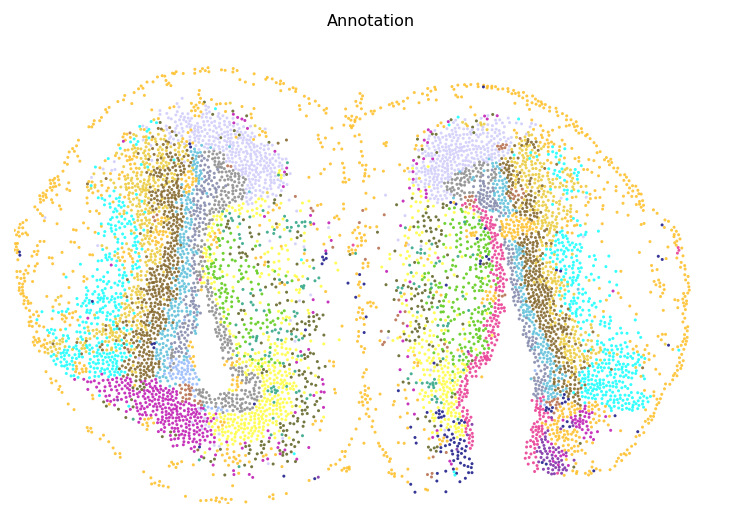

In [48]:
fig, ax = plt.subplots()
st.pl.space(adata, color=['Annotation'], pointsize=0.05,color_key=color_key,show_legend=False,ax=ax)
fig.subplots_adjust(right=0.7)
plt.rcParams['pdf.fonttype'] = 42
fig.set_size_inches(3,3)
#fig.savefig("2DPI.cluster.anno.pdf")

# 1. Find spatially adjacent clusters/celltypes

In [18]:
label = st.tl.create_label_class(adata, cat_key='Annotation')
adata.uns['__type'] = 'UMI'

weights_graph, distance_graph = st.tl.weighted_spatial_graph(
    adata,
    n_neighbors=10,
)

|-----> 
--- 18 labels, 7668 samples ---
initalized (19,) index ptr: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
initalized (7668,) indices: [0 0 0 ... 0 0 0]
initalized (7668,) data: [1 1 1 ... 1 1 1]

|-----> Deep copying AnnData object and working on the new copy. Original AnnData object will not be modified.
|-----> Matrix multiplying labels x weights x labels-transpose, shape (18, 7668) x (7668, 7668) x (7668, 18).


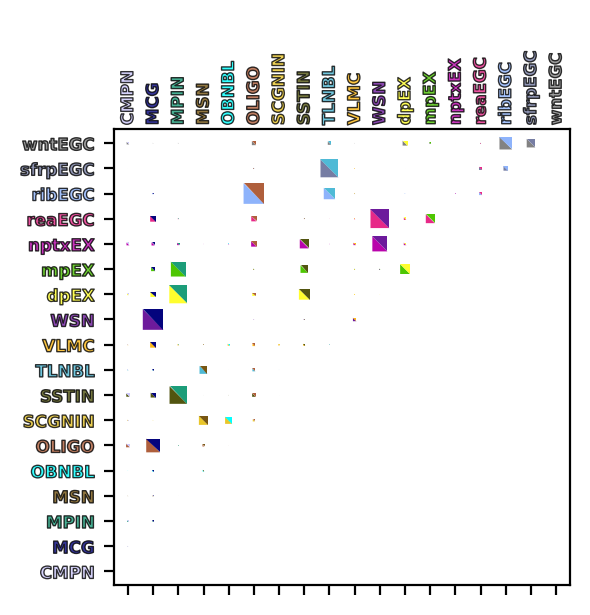

In [19]:
st.pl.plot_connections(
    label=label,
    weights_matrix=weights_graph,
    figsize=(3,3),
    save_show_or_return='show',
    title_str=" ",
    title_fontsize = 6,
    label_fontsize = 6,
    colormap = color_key,
    #save_kwargs={"prefix": "./figures/spatial strengths types"}
)

# 2.Given two celltypes, find space-specific ligand-receptor pairs.

In [50]:
adata=ad.read("../06.axolotl/data/mydata/2DPI_injury_sub.h5ad")
adata.uns['__type'] = 'UMI'
adata

AnnData object with n_obs × n_vars = 2843 × 27324
    obs: 'CellID', 'spatial_leiden_e30_s8', 'Batch', 'cell_id', 'seurat_clusters', 'inj_uninj', 'D_V', 'inj_M_L', 'Annotation', 'spec'
    var: 'Axolotl_ID', 'hs_gene'
    uns: 'Annotation_colors', 'Injury_2DPI_rep1_SS200000147BL_D5', '__type', 'angle_dict', 'spatial_neighbors', 'spec_colors'
    obsm: 'X_pca', 'X_spatial', 'spatial'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [34]:
sender_ct = 'reaEGC'
receptor_ct = 'WSN'

`plot all cell pair`

(None, [<AxesSubplot:title={'center':'spec'}>])

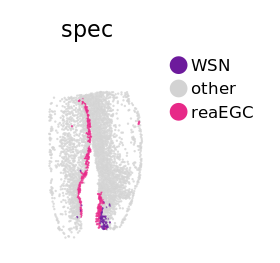

In [35]:
adata.obs['spec'] = 'other'
adata.obs.loc[adata.obs['Annotation']==sender_ct,'spec']=sender_ct
adata.obs.loc[adata.obs['Annotation']==receptor_ct,'spec']=receptor_ct
adata.obs['spec'] = adata.obs['spec'].apply(str).astype('category')

##plot all cell pair
st.configuration.set_pub_style_mpltex()
st.pl.space(adata, 
            color=['spec'], 
            pointsize=0.01,
            color_key={'other':'#D3D3D3',sender_ct:color_key[sender_ct],receptor_ct:color_key[receptor_ct]},
            show_legend='upper left',
            figsize=(65.7861/72, 85/72),
            save_show_or_return='return',
            #save_kwargs={"prefix": "./figures/left_2DPI_uninjury_cci_" + sender_ct + "_" + receptor_ct + "_all_cell_pair"}
           )

`st.tl.find_cci_two_group`

In [36]:
dyn.tl.neighbors(adata, X_data=adata.obsm['spatial'] ,n_neighbors=10, basis='pca', result_prefix="spatial")

|-----> Start computing neighbor graph...
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----> <insert> spatial_connectivities to obsp in AnnData Object.
|-----> <insert> spatial_distances to obsp in AnnData Object.
|-----> <insert> spatial_neighbors to uns in AnnData Object.
|-----> <insert> spatial_neighbors.indices to uns in AnnData Object.
|-----> <insert> spatial_neighbors.params to uns in AnnData Object.


AnnData object with n_obs × n_vars = 2843 × 27324
    obs: 'CellID', 'spatial_leiden_e30_s8', 'Batch', 'cell_id', 'seurat_clusters', 'inj_uninj', 'D_V', 'inj_M_L', 'Annotation', 'spec'
    var: 'Axolotl_ID', 'hs_gene'
    uns: 'Annotation_colors', 'Injury_2DPI_rep1_SS200000147BL_D5', '__type', 'angle_dict', 'spatial_neighbors', 'spec_colors'
    obsm: 'X_pca', 'X_spatial', 'spatial'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [37]:
globals()[sender_ct+'_'+receptor_ct] = st.tl.find_cci_two_group(adata,
                               path='/DATA/User/zuolulu/spateo-release/spateo/tools/database/',
                               species='axolotl',
                               group='Annotation',
                               sender_group= sender_ct,
                               receiver_group = receptor_ct,
                               filter_lr='outer',
                               min_pairs = 0,
                               min_pairs_ratio = 0,
                               top = 20,
                               )

`plot spatial neighbors cell pair`

(None, [<AxesSubplot:title={'center':'spec'}>])

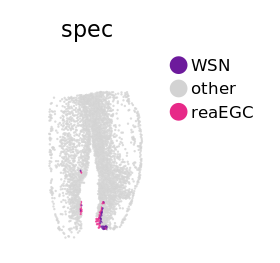

In [38]:
adata.obs['spec'] = 'other'
adata.obs.loc[adata.obs.index.isin(globals()[sender_ct+'_'+receptor_ct]['cell_pair']['cell_sender'].tolist()),'spec']=sender_ct
adata.obs.loc[adata.obs.index.isin(globals()[sender_ct+'_'+receptor_ct]['cell_pair']['cell_receiver'].tolist()),'spec']=receptor_ct
adata.obs['spec'] = adata.obs['spec'].apply(str).astype('category')
#plot
st.pl.space(adata, 
            color=['spec'], 
            pointsize=0.01,
            color_key={'other':'#D3D3D3',sender_ct:color_key[sender_ct],receptor_ct:color_key[receptor_ct]},
            show_legend='upper left',
            figsize=(65.7861/72, 85/72),
            save_show_or_return='return',
            #save_kwargs={"prefix": "./figures/left_2DPI_uninjury_cci_" + sender_ct + "_" + receptor_ct + "_cell_pair"}
           )

In [39]:
df = globals()[sender_ct + '_' + receptor_ct]['lr_pair']
df = df.loc[df['lr_co_exp_num']>0].sort_values('lr_co_exp_ratio', ascending = False)[0:20]
df

,from,to,human_ligand,human_receptor,lr_pair,lr_co_exp_num,lr_co_exp_ratio,lr_co_exp_ratio_pvalue,sr_pair
732,AMEX60DD050822,AMEX60DD033101,TNC,SDC1,TNC-SDC1,12,0.166667,0.000,reaEGC-WSN
1388,AMEX60DD007022,AMEX60DD033101,PTN,SDC1,PTN-SDC1,12,0.166667,0.000,reaEGC-WSN
1498,AMEX60DD028699,AMEX60DD009754,TGM2,ITGB3,TGM2-ITGB3,10,0.138889,0.000,reaEGC-WSN
1030,AMEX60DD001392,AMEX60DD055396,TGFA,ERBB4,TGFA-ERBB4,7,0.097222,0.000,reaEGC-WSN
570,AMEX60DD049502,AMEX60DD033101,MMP7,SDC1,MMP7-SDC1,4,0.055556,0.000,reaEGC-WSN
575,AMEX60DD012285,AMEX60DD033101,THBS1,SDC1,THBS1-SDC1,4,0.055556,0.000,reaEGC-WSN
947,AMEX60DD003175,AMEX60DD029326,SST,SSTR3,SST-SSTR3,4,0.055556,0.000,reaEGC-WSN
2406,AMEX60DD001392,AMEX60DD010312,TGFA,ERBB2,TGFA-ERBB2,3,0.041667,0.000,reaEGC-WSN
3392,AMEX60DD039450,AMEX60DDU001005617,ADCYAP1,GPR84,ADCYAP1-GPR84,2,0.027778,0.000,reaEGC-WSN
1676,AMEX60DD008951,AMEX60DD055675,LAMB3,ITGA6,LAMB3-ITGA6,1,0.013889,0.000,reaEGC-WSN


In [43]:
df.to_csv("/DATA/User/zuolulu/06.axolotl/result-1023/plot_heatmap_input_LR.csv")
df = pd.read_csv("/DATA/User/zuolulu/06.axolotl/result-1023/plot_heatmap_input_LR.csv",index_col=0)

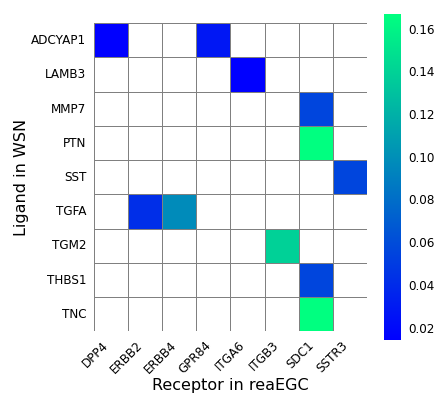

In [45]:
st.configuration.set_pub_style_mpltex()

%matplotlib inline 
data1=df.iloc[:,[2,3,6]]
test=data1.pivot(index="human_ligand", columns="human_receptor", values="lr_co_exp_ratio").fillna(0)
fig = plt.figure()
fig.set_size_inches(3,3)
x_label=list(test.columns.tolist())
y_label=list(test.index)
ax = sns.heatmap(test,
            cmap="winter",
            square=True,
            yticklabels=y_label,
            linecolor='grey',
            linewidths=0.3,
            annot_kws={'size':9,'weight':'bold',},
            xticklabels=x_label,
            mask=(test<0.01))
plt.gcf().subplots_adjust(bottom=0.3)
plt.xlabel("Receptor in reaEGC")
plt.ylabel("Ligand in WSN")
ax.set_xticklabels(x_label, rotation = 45, ha="right")
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
plt.tight_layout()
#plt.savefig("./figures/2DPI_sub_cci_WSN_ReaEGC_heatmap.pdf", transparent=True)

# 3. (Optial) Loop executes multiple two-cell type interactions.

In [51]:
adata

AnnData object with n_obs × n_vars = 2843 × 27324
    obs: 'CellID', 'spatial_leiden_e30_s8', 'Batch', 'cell_id', 'seurat_clusters', 'inj_uninj', 'D_V', 'inj_M_L', 'Annotation', 'spec'
    var: 'Axolotl_ID', 'hs_gene'
    uns: 'Annotation_colors', 'Injury_2DPI_rep1_SS200000147BL_D5', '__type', 'angle_dict', 'spatial_neighbors', 'spec_colors'
    obsm: 'X_pca', 'X_spatial', 'spatial'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [53]:
a = ['reaEGC','MCG','WSN','nptxEX']
a

['reaEGC', 'MCG', 'WSN', 'nptxEX']

In [54]:
df = pd.DataFrame({
    "celltype_sender":np.repeat(a, 5),
    "celltype_receiver": list(a)*5,
})
df = df[df['celltype_sender'] != df['celltype_receiver']]
df["celltype_pair"] = df["celltype_sender"].str.cat(df["celltype_receiver"], sep="-")
df

,celltype_sender,celltype_receiver,celltype_pair
1,reaEGC,MCG,reaEGC-MCG
2,reaEGC,WSN,reaEGC-WSN
3,reaEGC,nptxEX,reaEGC-nptxEX
6,MCG,WSN,MCG-WSN
7,MCG,nptxEX,MCG-nptxEX
8,MCG,reaEGC,MCG-reaEGC
11,WSN,nptxEX,WSN-nptxEX
12,WSN,reaEGC,WSN-reaEGC
13,WSN,MCG,WSN-MCG
16,nptxEX,reaEGC,nptxEX-reaEGC


In [55]:
res = {}
for i in df['celltype_pair']:
    s,r = i.split(sep='-')
    res[i] = st.tl.find_cci_two_group(adata,
                               path='/DATA/User/zuolulu/spateo-release/spateo/tools/database/',
                               species='axolotl',
                               group='Annotation',
                               sender_group= s,
                               receiver_group = r,
                               filter_lr='outer',
                               min_pairs = 0,
                               min_pairs_ratio = 0,
                               top = 20,)

In [56]:
res

{'reaEGC-MCG': {'cell_pair':               cell_pair_name cell_sender cell_receiver
  11129  CELL.1389>-<CELL.1310   CELL.1389     CELL.1310
  11231  CELL.1405>-<CELL.1458   CELL.1405     CELL.1458
  11233  CELL.1405>-<CELL.1310   CELL.1405     CELL.1310
  11234  CELL.1405>-<CELL.1386   CELL.1405     CELL.1386
  11237  CELL.1405>-<CELL.1448   CELL.1405     CELL.1448
  11991  CELL.1488>-<CELL.1458   CELL.1488     CELL.1458
  11999  CELL.1488>-<CELL.1386   CELL.1488     CELL.1386
  12048  CELL.1494>-<CELL.1458   CELL.1494     CELL.1458
  12252  CELL.1518>-<CELL.1458   CELL.1518     CELL.1458
  12253  CELL.1518>-<CELL.1448   CELL.1518     CELL.1448
  12259  CELL.1518>-<CELL.1386   CELL.1518     CELL.1386
  12897  CELL.1592>-<CELL.1458   CELL.1592     CELL.1458
  12918  CELL.1594>-<CELL.1448   CELL.1594     CELL.1448
  13016  CELL.1607>-<CELL.1547   CELL.1607     CELL.1547
  13017  CELL.1607>-<CELL.1434   CELL.1607     CELL.1434
  13159  CELL.1624>-<CELL.1458   CELL.1624     CELL.1458
  13